Importing modules

In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.formula.api as sm
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [12]:
#read in data
automobile = pd.read_csv('cars.csv')
automobile.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


In [9]:
#creating copy
automobilecopy = automobile.copy()

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
#data type
automobile.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
#data structure
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

EXPLORING THE DATA AND ATTRIBUTES

In [6]:
#data distribution or summary
automobile.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,2555.566,126.907,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852
min,1.000,-2.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,52.000,0.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000
50%,103.000,1.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,154.000,2.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000
max,205.000,3.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


In [566]:

automobile.describe(include='all')

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,carmake_avg_price_x,carmake_avg_price_y,carmake_avg_price,make_category
count,205.000,205.000,205,205,205,205,205,205,205.000,205.000,205.000,205.000,205.000,205,205,205.000,205,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205,205.000,205.000,205.000,205
unique,NaN,6.000,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,3
top,NaN,0.000,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota,NaN,NaN,NaN,cheap
freq,NaN,67.000,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,95
mean,103.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.757,174.049,65.908,53.725,2555.566,NaN,NaN,126.907,NaN,3.330,3.255,10.143,104.117,5125.122,25.220,30.751,13276.711,NaN,13276.711,13276.711,13276.711,NaN
std,59.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.022,12.337,2.145,2.444,520.680,NaN,NaN,41.643,NaN,0.271,0.314,3.972,39.544,476.986,6.542,6.886,7988.852,NaN,7154.179,7154.179,7154.179,NaN
min,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600,141.100,60.300,47.800,1488.000,NaN,NaN,61.000,NaN,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000,NaN,6007.000,6007.000,6007.000,NaN
25%,52.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500,166.300,64.100,52.000,2145.000,NaN,NaN,97.000,NaN,3.150,3.110,8.600,70.000,4800.000,19.000,25.000,7788.000,NaN,9239.769,9239.769,9239.769,NaN
50%,103.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000,173.200,65.500,54.100,2414.000,NaN,NaN,120.000,NaN,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000,NaN,10077.500,10077.500,10077.500,NaN
75%,154.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400,183.100,66.900,55.500,2935.000,NaN,NaN,141.000,NaN,3.580,3.410,9.400,116.000,5500.000,30.000,34.000,16503.000,NaN,15489.091,15489.091,15489.091,NaN


In [13]:
wheelbase_count=automobile['wheelbase'].value_counts().sort_index()
wheelbase_count

86.600      2
88.400      1
88.600      2
89.500      3
91.300      2
93.000      1
93.100      5
93.300      1
93.700     20
94.300      1
94.500     21
95.100      1
95.300      4
95.700     13
95.900      5
96.000      1
96.100      2
96.300      6
96.500      8
96.600      1
96.900      2
97.000      4
97.200      5
97.300      7
98.400      7
98.800      6
99.100      6
99.200      1
99.400      1
99.500      1
99.800      2
100.400     6
101.200     4
102.000     1
102.400     5
102.700     1
102.900     2
103.300     2
103.500     3
104.300     6
104.500     2
104.900     2
105.800     3
106.700     1
107.900     6
108.000     1
109.100     5
110.000     3
112.000     1
113.000     2
114.200     4
115.600     2
120.900     1
Name: wheelbase, dtype: int64

In [521]:
stroke_count=automobile['stroke'].value_counts().sort_index()
stroke_count

2.070     1
2.190     2
2.360     1
2.640    11
2.680     2
2.760     1
2.800     2
2.870     1
2.900     3
3.030    14
3.070     6
3.080     2
3.100     2
3.110     6
3.120     1
3.150    14
3.160     1
3.190     6
3.210     1
3.230    14
3.255     4
3.270     6
3.290     9
3.350     9
3.390    13
3.400    20
3.410     6
3.460     8
3.470     4
3.500     6
3.520     5
3.540     4
3.580     6
3.640     5
3.860     4
3.900     3
4.170     2
Name: stroke, dtype: int64

In [522]:
boreratio_count=automobile['boreratio'].value_counts().sort_index()
boreratio_count

2.540     1
2.680     1
2.910     7
2.920     1
2.970    12
2.990     1
3.010     5
3.030    12
3.050     6
3.080     1
3.130     2
3.150    15
3.170     3
3.190    20
3.240     2
3.270     7
3.310     8
3.330     6
3.340     1
3.350     4
3.390     6
3.430     8
3.460     9
3.470     2
3.500     2
3.540     6
3.580     6
3.590     3
3.600     1
3.610     1
3.620    23
3.630     2
3.700     5
3.740     3
3.760     1
3.780     8
3.800     2
3.940     2
Name: boreratio, dtype: int64

In [516]:
carwidth_count=automobile['carwidth'].value_counts().sort_index()
carwidth_count

60.300     1
61.800     1
62.500     1
63.400     1
63.600    11
63.800    24
63.900     3
64.000     9
64.100     2
64.200     6
64.400    10
64.600     2
64.800     4
65.000     3
65.200     7
65.400    15
65.500     8
65.600     6
65.700     4
66.000     1
66.100     2
66.200     1
66.300     6
66.400     1
66.500    23
66.600     1
66.900     5
67.200     6
67.700     2
67.900     5
68.000     1
68.300     2
68.400    10
68.800     1
68.900     4
69.600     2
70.300     3
70.500     1
70.600     1
70.900     1
71.400     3
71.700     3
72.000     1
72.300     1
Name: carwidth, dtype: int64

In [517]:
carheight_count=automobile['carheight'].value_counts().sort_index()
carheight_count

47.800     1
48.800     2
49.400     2
49.600     4
49.700     3
50.200     6
50.500     2
50.600     5
50.800    14
51.000     1
51.400     2
51.600     7
52.000    12
52.400     1
52.500     3
52.600     7
52.800     6
53.000     6
53.100     1
53.200     1
53.300     4
53.500     3
53.700     5
53.900     2
54.100    10
54.300     8
54.400     2
54.500    10
54.700     2
54.800     1
54.900     6
55.100     5
55.200     1
55.400     1
55.500     9
55.600     1
55.700    12
55.900     1
56.000     1
56.100     7
56.200     3
56.300     2
56.500     2
56.700     8
57.500     3
58.300     1
58.700     4
59.100     3
59.800     2
Name: carheight, dtype: int64

In [519]:
curbweight_count=automobile['curbweight'].value_counts().sort_index()
curbweight_count


1488    1
1713    1
1819    1
1837    1
1874    2
       ..
3750    1
3770    1
3900    1
3950    1
4066    2
Name: curbweight, Length: 171, dtype: int64

In [ ]:
enginesize_count=automobile['enginesize'].value_counts().sort_index()
enginesize_count

C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


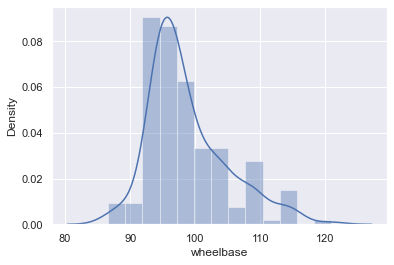

In [14]:
#the wheelbase attributes is the distance between  the center of front and rear wheel
#it is not very skewed to the right as the mean and median are very close
sns.distplot(automobile['wheelbase'])
plt.show()

In [15]:
automobile["wheelbase"].describe()

count   205.000
mean     98.757
std       6.022
min      86.600
25%      94.500
50%      97.000
75%     102.400
max     120.900
Name: wheelbase, dtype: float64

<AxesSubplot:ylabel='wheelbase'>

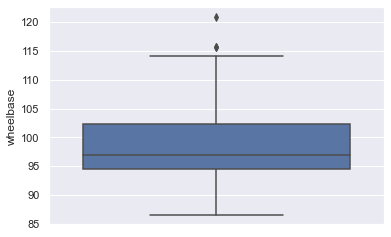

In [16]:
sns.boxplot(y=automobile["wheelbase"])

In [17]:
#converting symboling to categorical
# symboling : Its assigned insurance risk rating
#             A value of +3 indicates that the auto is risky,
#             -2 that it is probably pretty safe.(Categorical)
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
#attribute symboling
#frequency of symboling
#symboling indicates the insurance risk level of any car. It is the 
#initial assigned risk factor associated with car,s price
#if a car is riskier, their symboling is adjusted by moving it up the scale
# a value of +3 implies that the car is most hazardous, -2 implies that it is least hazardous
#Most cars are 0, 1, 2 symboling
#variable is significant
automobile['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [533]:
pd.crosstab(automobile['symboling'], columns = 'count', normalize=True)

col_0,count
symboling,
-2,0.015
-1,0.107
0,0.327
1,0.263
2,0.156
3,0.132


In [537]:
pd.crosstab(automobile['enginelocation'], columns = 'count', normalize=True)

col_0,count
enginelocation,
front,0.985
rear,0.015


In [538]:
pd.crosstab(automobile['fuelsystem'], columns = 'count', normalize=True)

col_0,count
fuelsystem,
1bbl,0.054
2bbl,0.322
4bbl,0.015
idi,0.098
mfi,0.005
mpfi,0.459
spdi,0.044
spfi,0.005


In [541]:
pd.crosstab(automobile['fueltype'], columns = 'count', normalize=True)

col_0,count
fueltype,
diesel,0.098
gas,0.902


In [544]:
pd.crosstab(automobile['aspiration'], columns = 'count', normalize=True)

col_0,count
aspiration,
std,0.820
turbo,0.180


In [562]:
pd.crosstab(automobile['carbody'], columns = 'count', normalize=True)

col_0,count
carbody,
convertible,0.029
hardtop,0.039
hatchback,0.341
sedan,0.468
wagon,0.122


In [549]:
pd.crosstab(automobile['doornumber'], columns = 'count', normalize=True)

col_0,count
doornumber,
four,0.561
two,0.439


In [552]:
pd.crosstab(automobile['drivewheel'], columns = 'count', normalize=True)

col_0,count
drivewheel,
4wd,0.044
fwd,0.585
rwd,0.371


In [553]:
pd.crosstab(automobile['enginetype'], columns = 'count', normalize=True)

col_0,count
enginetype,
dohc,0.059
dohcv,0.005
l,0.059
ohc,0.722
ohcf,0.073
ohcv,0.063
rotor,0.020


In [555]:
pd.crosstab(automobile['cylindernumber'], columns = 'count', normalize=True)

col_0,count
cylindernumber,
eight,0.024
five,0.054
four,0.776
six,0.117
three,0.005
twelve,0.005
two,0.020


In [530]:
pd.crosstab(automobile['symboling'], automobile['carbody'])

carbody,convertible,hardtop,hatchback,sedan,wagon
symboling,,,,,
-2,0,0,0,3,0
-1,0,0,2,13,7
0,0,1,8,43,15
1,0,1,27,23,3
2,1,4,13,14,0
3,5,2,20,0,0


In [536]:
pd.crosstab(automobile['symboling'], automobile['enginelocation'])

enginelocation,front,rear
symboling,,
-2,3,0
-1,22,0
0,67,0
1,54,0
2,32,0
3,24,3


In [565]:
pd.crosstab(automobile['fueltype'], automobile['CarName'])

KeyError: 'CarName'

<AxesSubplot:xlabel='symboling', ylabel='count'>

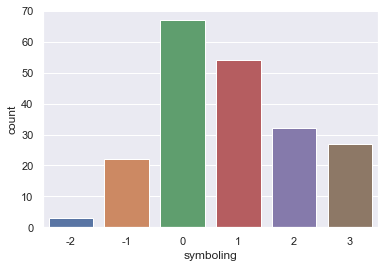

In [19]:
sns.countplot(x='symboling', data=automobile)

<AxesSubplot:xlabel='carbody', ylabel='count'>

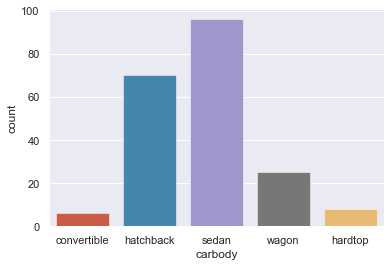

In [563]:
sns.countplot(x='carbody', data=automobile)

<AxesSubplot:xlabel='aspiration', ylabel='count'>

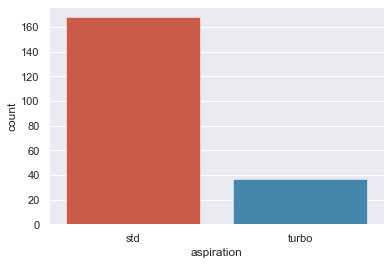

In [545]:
sns.countplot(x='aspiration', data=automobile)

<AxesSubplot:xlabel='enginetype', ylabel='count'>

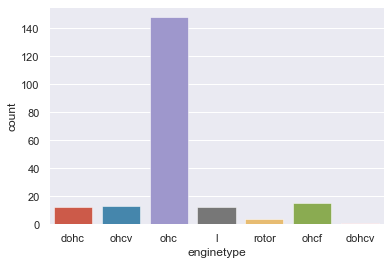

In [556]:
sns.countplot(x='enginetype', data=automobile)

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

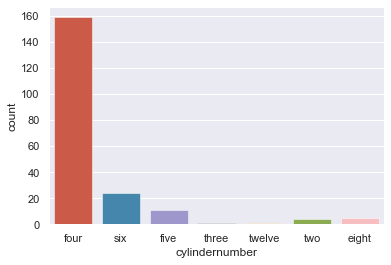

In [557]:
sns.countplot(x='cylindernumber', data=automobile)

<AxesSubplot:xlabel='fueltype', ylabel='count'>

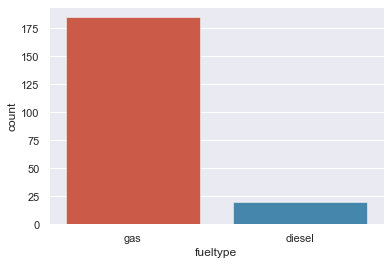

In [542]:
sns.countplot(x='fueltype', data=automobile)

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

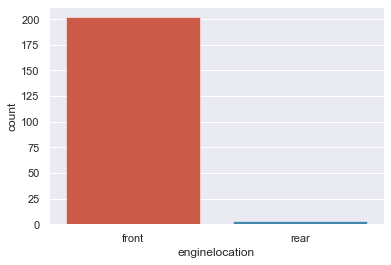

In [534]:
sns.countplot(x='enginelocation', data=automobile)

<AxesSubplot:xlabel='doornumber', ylabel='count'>

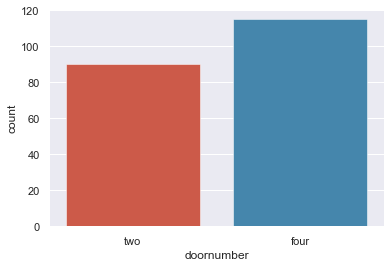

In [548]:
sns.countplot(x='doornumber', data=automobile)

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

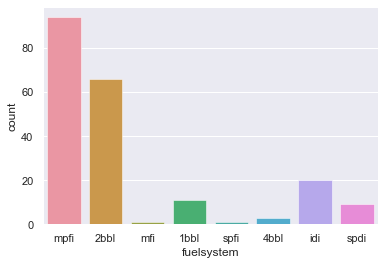

In [539]:
sns.countplot(x='fuelsystem', data=automobile)

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

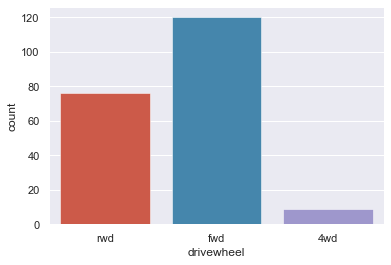

In [551]:
sns.countplot(x='drivewheel', data=automobile)

<AxesSubplot:xlabel='symboling', ylabel='price'>

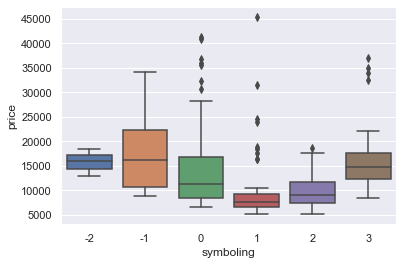

In [20]:
sns.boxplot(x='symboling', y='price', data = automobile)

<AxesSubplot:xlabel='carbody', ylabel='price'>

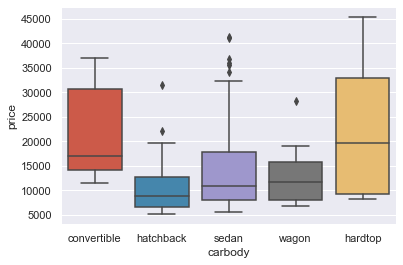

In [564]:
sns.boxplot(x='carbody', y='price', data = automobile)

<AxesSubplot:xlabel='enginetype', ylabel='price'>

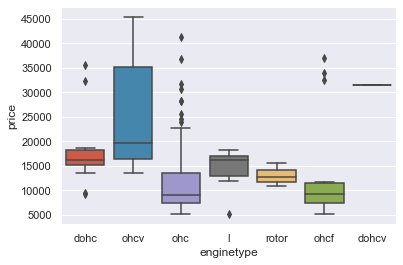

In [561]:
sns.boxplot(x='enginetype', y='price', data = automobile)

<AxesSubplot:xlabel='cylindernumber', ylabel='price'>

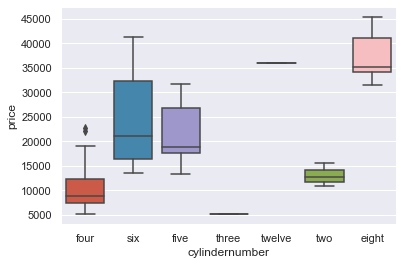

In [560]:
sns.boxplot(x='cylindernumber', y='price', data = automobile)

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

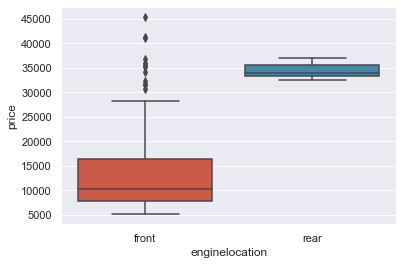

In [535]:
sns.boxplot(x='enginelocation', y='price', data = automobile)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

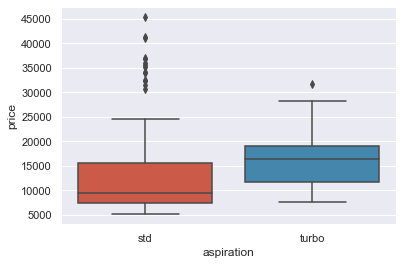

In [546]:
sns.boxplot(x='aspiration', y='price', data = automobile)

<AxesSubplot:xlabel='doornumber', ylabel='price'>

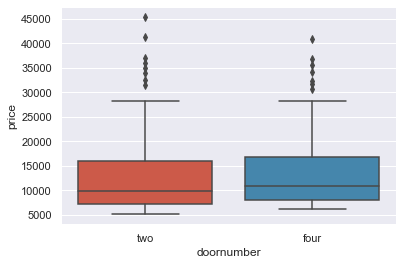

In [547]:
sns.boxplot(x='doornumber', y='price', data = automobile)

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

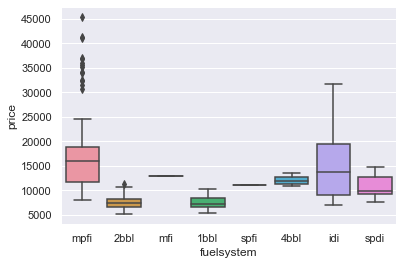

In [540]:
sns.boxplot(x='fuelsystem', y='price', data = automobile)

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

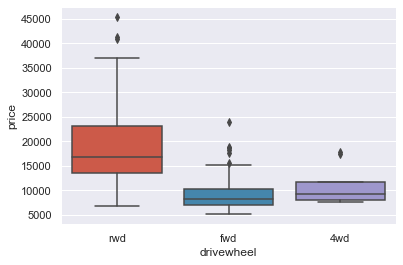

In [550]:
sns.boxplot(x='drivewheel', y='price', data = automobile)

<AxesSubplot:xlabel='fueltype', ylabel='price'>

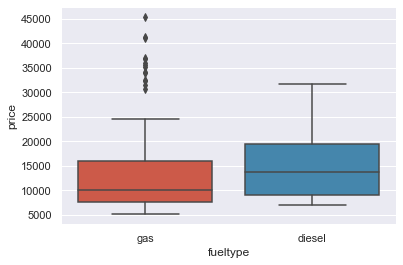

In [543]:
sns.boxplot(x='fueltype', y='price', data = automobile)

Question 1: Data cleaning

In [214]:
#numberof missing values in each column
missing = automobile.isnull().sum()

In [215]:
#checking duplicates
duplicate = automobile.duplicated().sum()

In [21]:
#converting symboling to categorical
automobile['symboling'] = automobile['symboling'].astype('object')
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [27]:
#Extracting car names.i.e. the first word (before space)
carnames = automobile['CarName'].apply(lambda x: x.split(" ")[0])


In [216]:
automobile['car_company']=carnames#carbrands or carmakes
automobile['car_company'].value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [30]:

#many car names are duplicates like toyota and toyouta, porsche and porcshce etc.
# we need to fix incorrect spelling and get carnames column in order
#volkswagen
automobile.loc[(automobile['car_company']=="vw")|(automobile['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

automobile.loc[(automobile['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
automobile.loc[(automobile['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
automobile.loc[automobile['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
automobile.loc[automobile['car_company'] == "maxda", 'car_company'] = 'mazda'

automobile['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [217]:
# drop carname variable
automobile = automobile.drop('CarName', axis=1)

KeyError: "['CarName'] not found in axis"

Conclusion:
#no missing values and no duplicates

#all attributes is in correct format, however since symboling is a categorical attribute we decided to change its data type

#we also renamed values with wrong names

Q2

In [33]:
automobile.car_company.describe()

count        205
unique        22
top       toyota
freq          32
Name: car_company, dtype: object

In [42]:
auto_avg_price = automobile[['car_company','price']].groupby("car_company", as_index = False).mean().rename(columns={'price':'carmake_avg_price'})


Q3

In [44]:
#Question3: Calculer un ordre de prix pour l’entreprise : cheap, medium, high
automobile=automobile.merge(auto_avg_price, on = 'car_company')
automobile['make_category'] = automobile['carmake_avg_price'].apply(lambda x : "cheap" if x < 10000 
                                                     else ("medium" if 10000 <= x < 20000
                                                           else "High"))

Q4

In [415]:
model= "price ~ curbweight"
result = sm.ols(formula=model, data=automobile).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.21e-54
Time:                        20:48:57   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.948e+04   1543.962    -12.614      0.000   -2.25e+04   -1.64e+04
curbweight    12.8162      0.592     21.647      0.000      11.649      13.984
==============================================================================
Omnibus:                       85.362   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.847
Skew:                           1.591   Prob(JB):                     7.34e-84
Kurtosis:                       8.890   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q5

In [418]:
model2 = "price ~ curbweight + enginesize"
result = sm.ols(formula=model2, data=automobile).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           3.77e-70
Time:                        20:54:21   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.415e+04   1387.924    -10.192      0.000   -1.69e+04   -1.14e+04
curbweight     5.0921      0.930      5.472      0.000       3.257       6.927
enginesize   113.5415     11.635      9.759      0.000      90.601     136.482
==============================================================================
Omnibus:                       38.837   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.341
Skew:                           0.871   Prob(JB):                     1.78e-19
Kurtosis:                       5.659   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q6: Encoding


In [88]:
Xr=automobile.drop(columns=['price', 'car_ID', 'carmake_avg_price_x', 'carmake_avg_price_y'])

In [89]:
# creating dummy variables for categorical variables
auto_cat = Xr.select_dtypes(include=['object'])

In [90]:
#creating dummy variables onehot
automobile_dummies = pd.get_dummies(auto_cat, drop_first=True)
automobile_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,make_category_cheap,make_category_medium
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
automobile_dummies.shape

(205, 57)

#Question7:To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.

In [300]:
Xp=Xr.drop(columns=auto_cat)

In [301]:
y=automobile['price']

In [302]:
Xp = pd.concat([Xp, y], axis = 1)

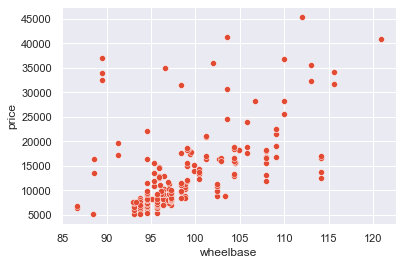

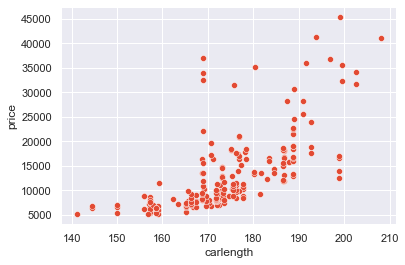

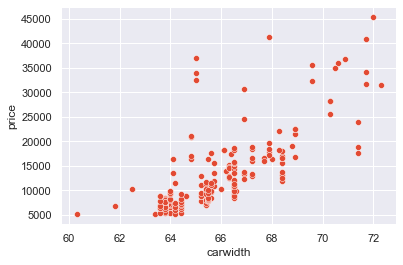

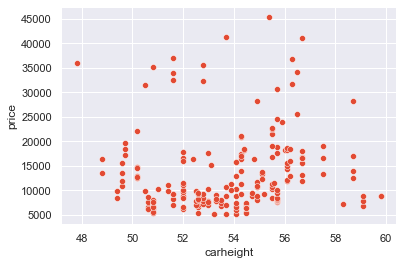

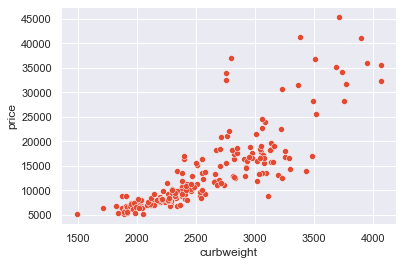

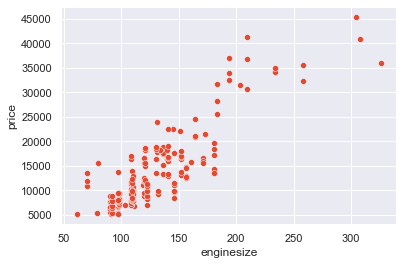

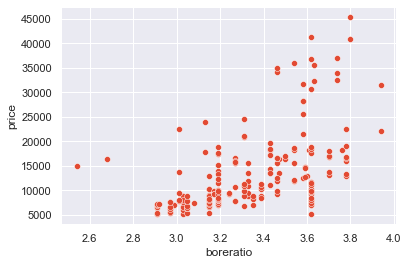

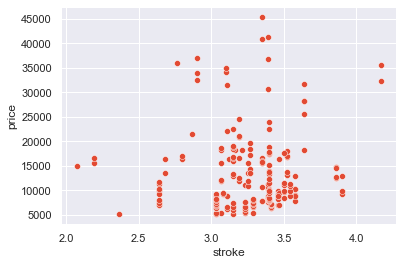

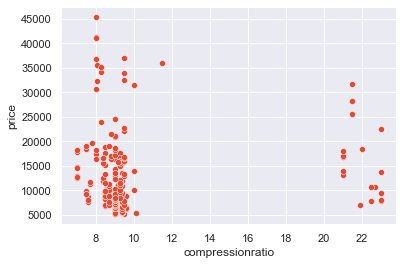

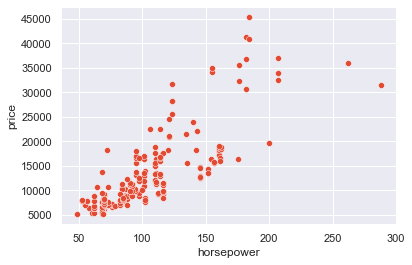

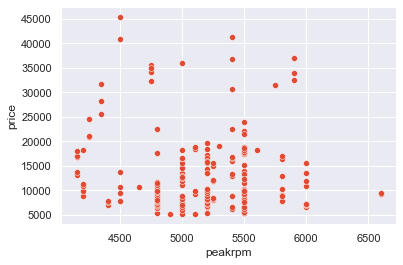

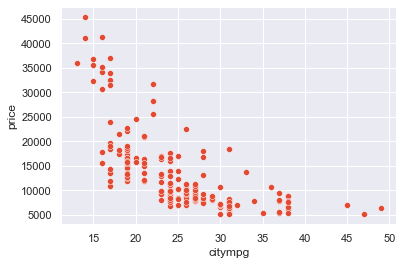

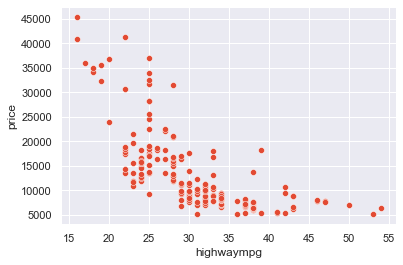

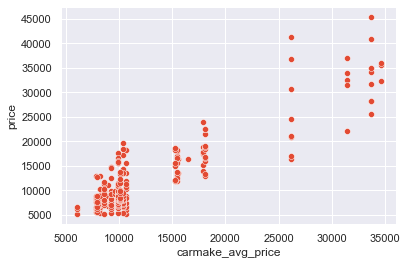

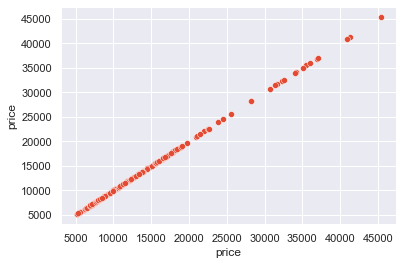

In [303]:
for i, col in enumerate (Xp.columns):
    plt.figure(i)
    sns.scatterplot(x=Xp[col],y=Xp['price'])

Attributes with linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg.

Other attributes either don't have a link with price the link is not strong. None of the attributes seem to have polynomial relationship with price.

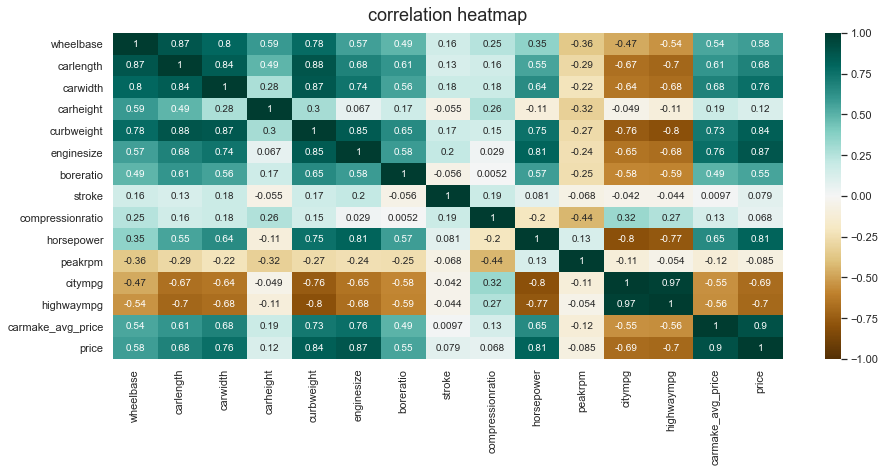

In [290]:
corr=Xp.corr()
plt.figure(figsize=(15,6))
heatmap=sns.heatmap(corr,annot=True,vmin=-1, vmax=1,cmap="BrBG")
heatmap.set_title('correlation heatmap', fontdict ={'fontsize': 18}, pad=12);

 
Target att and explanatory attributes
+ corr: Price is highly correlated with the enginesize, curbweight, horsepower, carwidth (all of these attributes indicate the size/weight/engine power of the car)

Negative corr: Price negatively corr with mpg var's citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg

Correlation among independent variables:
Many explanatory atts are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity.

In [325]:
autom=pd.concat([Xp,automobile_dummies],axis=1)
autom

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carmake_avg_price,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,make_category_cheap,make_category_medium
0,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111,5000,21,27,15498.333,13495.000,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111,5000,21,27,15498.333,16500.000,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,94.500,171.200,65.500,52.400,2823,152,2.680,3.470,9.000,154,5000,19,26,15498.333,16500.000,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,99.800,176.600,66.200,54.300,2337,109,3.190,3.400,10.000,102,5500,24,30,17859.167,13950.000,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,99.400,176.600,66.400,54.300,2824,136,3.190,3.400,8.000,115,5500,18,22,17859.167,17450.000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.100,188.800,68.900,55.500,2952,141,3.780,3.150,9.500,114,5400,23,28,18063.182,16845.000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
201,109.100,188.800,68.800,55.500,3049,141,3.780,3.150,8.700,160,5300,19,25,18063.182,19045.000,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
202,109.100,188.800,68.900,55.500,3012,173,3.580,2.870,8.800,134,5500,18,23,18063.182,21485.000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
203,109.100,188.800,68.900,55.500,3217,145,3.010,3.400,23.000,106,4800,26,27,18063.182,22470.000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [326]:
y1 = autom['price']

In [327]:
Xl = autom.drop('price', 1)
Xl

C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carmake_avg_price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,make_category_cheap,make_category_medium
0,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111,5000,21,27,15498.333,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,88.600,168.800,64.100,48.800,2548,130,3.470,2.680,9.000,111,5000,21,27,15498.333,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,94.500,171.200,65.500,52.400,2823,152,2.680,3.470,9.000,154,5000,19,26,15498.333,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,99.800,176.600,66.200,54.300,2337,109,3.190,3.400,10.000,102,5500,24,30,17859.167,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,99.400,176.600,66.400,54.300,2824,136,3.190,3.400,8.000,115,5500,18,22,17859.167,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.100,188.800,68.900,55.500,2952,141,3.780,3.150,9.500,114,5400,23,28,18063.182,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
201,109.100,188.800,68.800,55.500,3049,141,3.780,3.150,8.700,160,5300,19,25,18063.182,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
202,109.100,188.800,68.900,55.500,3012,173,3.580,2.870,8.800,134,5500,18,23,18063.182,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
203,109.100,188.800,68.900,55.500,3217,145,3.010,3.400,23.000,106,4800,26,27,18063.182,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [402]:

from sklearn.preprocessing import MinMaxScaler


array([[<AxesSubplot:title={'center':'1. before'}>,
        <AxesSubplot:title={'center':'2. after'}>]], dtype=object)

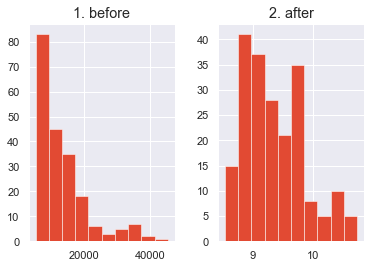

In [329]:
#plotting the variable price
prices = pd.DataFrame({"1. before":y1, "2. after":np.log(y1)})
prices.hist()

In [330]:
#transforming price as a logramithmic value
y1 = np.log(y1)

In [444]:
X_train, X_test, y_train, y_test = train_test_split(Xl, y1,test_size = 0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 71) (62, 71) (143,) (62,)


In [ ]:
scaler = MinMaxScaler()

In [332]:
cols=X_train.columns
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.columns=cols
X_train_scaled.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carmake_avg_price', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car

In [333]:
X_train_scaled.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carmake_avg_price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,make_category_cheap,make_category_medium
count,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000,143.000
mean,0.399,0.556,0.458,0.488,0.409,0.241,0.529,0.532,0.195,0.234,0.399,0.361,0.399,0.239,0.105,0.308,0.294,0.140,0.133,0.902,0.210,0.469,0.056,0.350,0.420,0.147,0.538,0.413,0.021,0.007,0.077,0.699,0.091,0.035,0.021,0.049,0.804,0.098,0.007,0.007,0.021,0.343,0.021,0.098,0.007,0.434,0.056,0.000,0.028,0.028,0.021,0.021,0.049,0.049,0.021,0.014,0.091,0.007,0.077,0.084,0.070,0.028,0.028,0.007,0.014,0.070,0.154,0.049,0.070,0.476,0.434
std,0.225,0.203,0.173,0.211,0.195,0.147,0.219,0.161,0.247,0.170,0.190,0.186,0.176,0.230,0.307,0.463,0.457,0.348,0.341,0.298,0.409,0.501,0.231,0.479,0.495,0.355,0.500,0.494,0.144,0.084,0.267,0.460,0.288,0.184,0.144,0.217,0.398,0.298,0.084,0.084,0.144,0.476,0.144,0.298,0.084,0.497,0.231,0.000,0.165,0.165,0.144,0.144,0.217,0.217,0.144,0.118,0.288,0.084,0.267,0.278,0.256,0.165,0.165,0.084,0.118,0.256,0.362,0.217,0.256,0.501,0.497
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.236,0.431,0.308,0.350,0.252,0.136,0.373,0.465,0.094,0.092,0.265,0.176,0.243,0.113,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.329,0.545,0.425,0.492,0.359,0.223,0.516,0.556,0.125,0.196,0.388,0.324,0.378,0.142,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.548,0.668,0.550,0.642,0.565,0.302,0.746,0.629,0.150,0.283,0.551,0.500,0.514,0.332,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,

In [357]:
cols=X_test.columns
X_test_scaled=pd.DataFrame(scaler.transform(X_test))
X_test_scaled.columns=cols
X_test_scaled.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'carmake_avg_price', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car

In [358]:
X_test_scaled.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carmake_avg_price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,make_category_cheap,make_category_medium
count,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000,62.000
mean,0.359,0.480,0.398,0.452,0.370,0.227,0.536,0.578,0.199,0.350,0.384,0.317,0.388,0.239,0.113,0.371,0.194,0.194,0.129,0.903,0.113,0.371,0.000,0.323,0.581,0.065,0.694,0.274,0.000,0.000,0.016,0.774,0.032,0.129,0.016,0.065,0.710,0.161,0.000,0.000,0.016,0.274,0.000,0.097,0.000,0.516,0.016,0.016,0.048,0.065,0.081,0.000,0.032,0.097,0.016,0.016,0.065,0.000,0.032,0.097,0.016,0.048,0.016,0.016,0.065,0.032,0.161,0.081,0.016,0.435,0.387
std,0.191,0.211,0.249,0.234,0.240,0.207,0.184,0.144,0.253,0.248,0.211,0.202,0.204,0.311,0.319,0.487,0.398,0.398,0.338,0.298,0.319,0.487,0.000,0.471,0.497,0.248,0.465,0.450,0.000,0.000,0.127,0.422,0.178,0.338,0.127,0.248,0.458,0.371,0.000,0.000,0.127,0.450,0.000,0.298,0.000,0.504,0.127,0.127,0.216,0.248,0.275,0.000,0.178,0.298,0.127,0.127,0.248,0.000,0.178,0.298,0.127,0.216,0.127,0.127,0.248,0.178,0.371,0.275,0.127,0.500,0.491
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.257,0.357,0.207,0.316,0.205,0.079,0.436,0.500,0.102,0.127,0.250,0.143,0.237,0.054,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.309,0.454,0.337,0.495,0.294,0.151,0.536,0.576,0.125,0.287,0.417,0.314,0.382,0.082,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.402,0.630,0.435,0.642,0.505,0.328,0.657,0.633,0.150,0.476,0.542,0.457,0.474,0.282,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000

In [167]:
print(143/205)

0.697560975609756


In [168]:
print(62/205)

0.3024390243902439


#Section 4. Baseline Model Building and Feature Selection using RFE
#Since dependent variable price looks to be linearly related to
#  most of the independent variables we are using Linear Regression 
# only and not other 
#types of regression like Polynomial, Random Forest/Boosting regression etc.

In [359]:
#finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

9.400709970120042


In [360]:
#repeating some value till length of test data
base_pred = np.repeat(base_pred, len(y_test))
base_pred

array([9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997, 9.40070997, 9.40070997, 9.40070997,
       9.40070997, 9.40070997])

In [403]:
#finding the rmse
base_root_mse = np.sqrt(mean_squared_error(y_test, base_pred))
base_root_mse

0.5298446094909218

In [362]:
#setting the intercept as true
lgr = LinearRegression(fit_intercept=True)

In [380]:
#model
model_lin1=lgr.fit(X_train_scaled, y_train)

In [384]:
#predicting model on test set: actually predicted values
auto_predictions_lin1 = lgr.predict(X_test_scaled)
auto_predictions_lin2 = lgr.predict(X_train_scaled)

In [385]:
auto_predictions_lin1

array([ 9.14156296,  8.8198249 ,  8.3556598 ,  8.87078934,  8.63875536,
       10.42248516,  8.94852098,  8.46479274,  8.59517674, 10.58658667,
        8.48733051,  8.86684199,  8.45894963,  9.59361782, 10.53650805,
        8.88820941,  8.66017039,  8.7760908 ,  8.69861296,  8.81705052,
        9.59172502,  9.49513718,  8.58544519,  9.0950631 ,  8.91941101,
        9.25934942,  9.81338048,  9.00830416,  9.72899954,  9.54656209,
        8.53613559,  9.68882475,  9.95670577, 11.1187695 ,  9.25147455,
        8.83092251,  8.62803833, 10.67024955,  9.35491807,  9.1117212 ,
        8.64897734,  9.49195315, 10.17394139,  8.98116792,  8.58497185,
        8.74426824, 10.38564066,  8.91508125,  9.49502932,  8.87488208,
        9.21652345,  8.76850784,  8.59449431,  8.47484885,  9.9547281 ,
        9.4567005 ,  9.41693984,  8.96592011,  9.02321896, 10.79184473,
        8.08184665, 10.20918666])

In [386]:
#computing mse and rmse
lin_mse1 = mean_squared_error(y_test, auto_predictions_lin1)
lin_mse2 = mean_squared_error(y_train, auto_predictions_lin2)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse1)#benchmark for comparison. Any other model o be built in the future should produce a less RMSE
print(lin_mse1)
print(lin_rmse2)#benchmark for comparison. Any other model o be built in the future should produce a less RMSE
print(lin_mse2)

0.2971557199275283
0.08830152188564766
0.0789311495192549
0.006230126364430971


In [404]:
#rsquare value of exlain he variabillity in y
r2_lin_test1 = model_lin1.score(X_test_scaled, y_test)
r2_lin_train1 = model_lin1.score(X_train_scaled, y_train)
print(r2_lin_test1, r2_lin_train1)

0.6854634288053457 0.9739388566811347


<AxesSubplot:ylabel='price'>

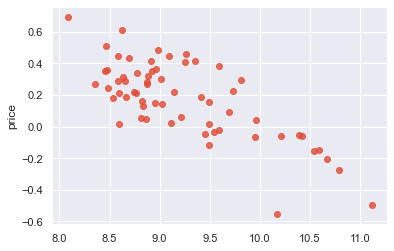

In [388]:
#regression diagnostic. residual plot analysis
residuals1 = y_test-auto_predictions_lin1
sns.regplot(x=auto_predictions_lin1, y= residuals1, scatter=True, fit_reg=False, data=automobile)

<AxesSubplot:ylabel='price'>

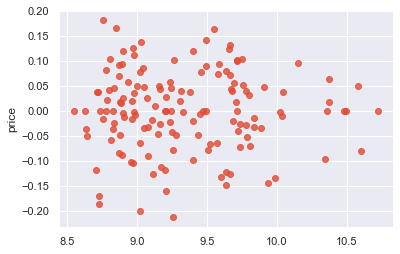

In [389]:
#regression diagnostic. residual plot analysis
residuals2 = y_train-auto_predictions_lin2
sns.regplot(x=auto_predictions_lin2, y= residuals2, scatter=True, fit_reg=False, data=automobile)

In [390]:
residuals1.describe()

count   62.000
mean     0.174
std      0.243
min     -0.555
25%      0.020
50%      0.213
75%      0.346
max      0.694
Name: price, dtype: float64

In [391]:
residuals2.describe()

count   143.000
mean     -0.000
std       0.079
min      -0.213
25%      -0.047
50%      -0.000
75%       0.049
max       0.182
Name: price, dtype: float64

In [396]:
rf = RandomForestRegressor(n_estimators= 100, max_features='auto', max_depth=100, min_samples_split=10,min_samples_leaf=4, random_state=1)

In [443]:
#model
model_rf1=rf.fit(X_train_scaled, y_train)

In [429]:
car_predictions_rf1 = rf.predict(X_test_scaled)

In [430]:
#mse and rmse
rf_mse1 = mean_squared_error(y_test, car_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)


0.1473905440227854


In [431]:
#rsquare
r2_rf_test1 = model_rf1.score(X_test_scaled, y_test)
r2_rf_train1 = model_rf1.score(X_train_scaled, y_train)
print(r2_rf_test1, r2_rf_train1)

0.9226175985794363 0.956668665447637


In [432]:
# Model with all features
lm=LinearRegression()
lm.fit(X_train_scaled,y_train)

y_pred_test=lm.predict(X_test_scaled)
y_pred_train=lm.predict(X_train_scaled)

In [433]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.9739388566811347
R-sqaure on test data: 0.6854634288053457
RMSE on train data: 0.07893114951925491
RMSE on test data: 0.2971557199275283


Feature selection using RFE
Lets first decide optimal number of features rather than arbitarily specifying count of features to be used in model in the RFE function

In [453]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
y1_train = list(y_train)
n_features_list = list(range(4, 40)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 40):

    # RFE with n attributes
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train_scaled, y1_train)

    # selecting features selected by rfe_n
    col_n = X_train_scaled.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train_scaled[col_n]
    X_test_rfe_n = X_test_scaled[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    # fitting the model with n featues
    lm_n = sm.OLS(y1_train, X_train_rfe_n).fit()
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    
    

C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[:

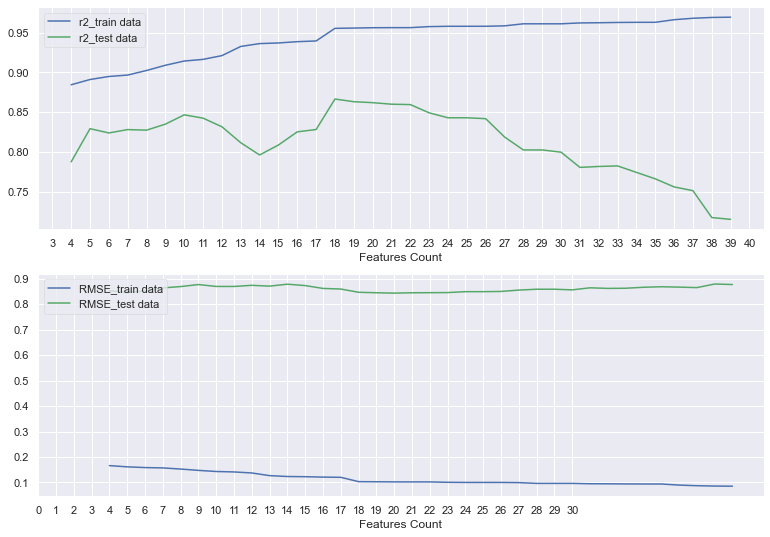

In [454]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))#method 2 of ticks

plt.show()


Model Bulding with optimal features count

Q2

Model Bulding with optimal features count

In [457]:
lm=LinearRegression()
rfe=RFE(lm,18)
rfe.fit(X_train_scaled,y_train)

col=X_train.columns[rfe.support_] #obtaining fetaure names of 12 most imp 

#making new Df's with  12 most imp features as per RFE algorithm
X_train_18= X_train_scaled[col]
X_test_18 = X_test_scaled[col]


# add a constant to the model
X_train_18 = sm.add_constant(X_train_18,has_constant='add')
X_test_18 = sm.add_constant(X_test_18,has_constant='add')



#fit OLS model
lm_sm=sm.OLS(y_train,X_train_18).fit()


#making predictions
y_pred_train=lm_sm.predict(X_train_18)
y_pred_test=lm_sm.predict(X_test_18)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

lm_sm.summary()

C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.9033758567352991
R-sq for train data is 0.9554298768689534
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 0.8466842296057018
RMSE for train data is 0.10322231915526603


C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     147.7
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.15e-74
Time:                        07:11:02   Log-Likelihood:                 121.83
No. Observations:                 143   AIC:                            -205.7
Df Residuals:                     124   BIC:                            -149.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.0709      0.105     86.145      0.000       8.862       9.279
wheelbase                0.5747      0.136      4.220      0.000       0.305       0.844
carlength               -0.6386      0.160     -4.001      0.000      -0.955      -0.323
carwidth                 0.5998      0.150      3.993      0.000       0.303       0.897
carheight               -0.3892      0.087     -4.497      0.000      -0.561      -0.218
curbweight               1.7070      0.156     10.933      0.000       1.398       2.016
citympg                 -0.2412      0.092     -2.624      0.010      -0.423      -0.059
carbody_hardtop         -0.2340      0.073     -3.195      0.002      -0.379      -0.089
carbody_hatchback       -0.3074      0.067     -4.610      0.000      -0.439      -0.175
carbody_sedan           -0.2073      0.069     -2.992      0.003      -0.344      -0.070
carbody_wagon           -0.2348      0.075     -3.132      0.002      -0.383      -0.086
enginelocation_rear      0.8796      0.083     10.548      0.000       0.715       1.045
cylindernumber_three     0.3675      0.120      3.068      0.003       0.130       0.605
car_company_bmw          0.4545      0.063      7.183      0.000       0.329       0.580
car_company_isuzu        0.1859      0.070      2.666      0.009       0.048       0.324
car_company_jaguar      -0.2788      0.099     -2.814      0.006      -0.475      -0.083
car_company_peugeot     -0.3487      0.049     -7.179      0.000      -0.445      -0.253
car_company_saab         0.3790      0.087      4.337      0.000       0.206       0.552
make_category_cheap     -0.1676      0.025     -6.641      0.000      -0.218      -0.118
==============================================================================
Omnibus:                        2.872   Durbin-Watson:                   2.365
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.586
Skew:                          -0.328   Prob(JB):                        0.274
Kurtosis:                       3.059   Cond. No.                         39.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Observations from above numbers:

1. R-sqaure for both test & train looks good
2. RMSE for both is closer (test is little < train which is fine and shows that model generalizes well)

Below Graph also shows predictions are mostly close to Actual values

Text(0.5, 0, 'Index')

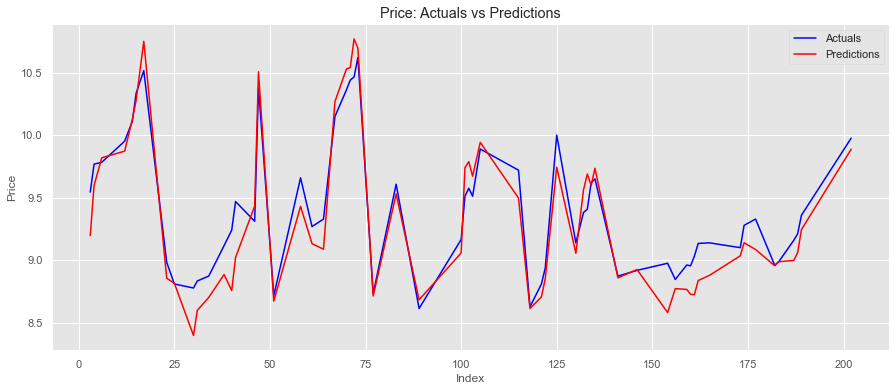

In [460]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

In [461]:
#grabbing important features 
features_18=lm_sm.params.index
features_18=features_18[1:] #we don't want constant (const) in our imp features list so removing it
features_18

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'citympg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginelocation_rear', 'cylindernumber_three',
       'car_company_bmw', 'car_company_isuzu', 'car_company_jaguar',
       'car_company_peugeot', 'car_company_saab', 'make_category_cheap'],
      dtype='object')

In [462]:
X_train_scaled[features_18].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,citympg,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,cylindernumber_three,car_company_bmw,car_company_isuzu,car_company_jaguar,car_company_peugeot,car_company_saab,make_category_cheap
0,0.236,0.414,0.292,0.558,0.175,0.529,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.465,0.668,0.550,0.608,0.455,0.176,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000



Section 5: Linear Regression Assumptions Validation

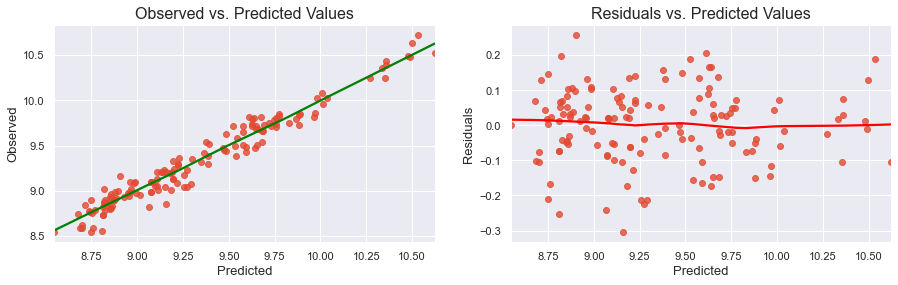

In [464]:
#To detect linearity, we inspect the observed vs. predicted values or residuals vs. predicted values charts. 

def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'green'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y1_train)


#Residuals more or less scattered evenly and predicted values-looks better

2. Homoscedasticity (equal variance) of residuals

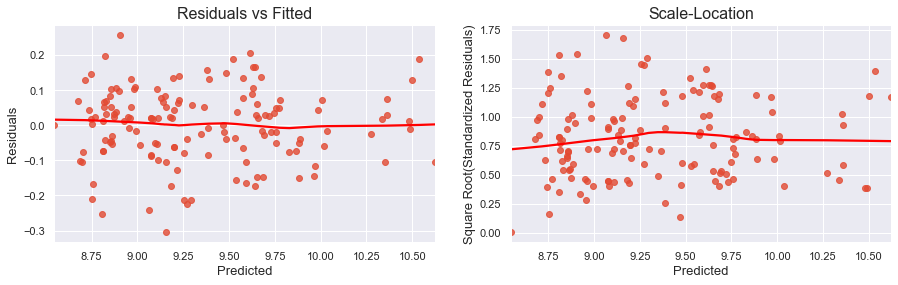

In [465]:
#Homoscedasticity-the variance of the error term must be the same across all levels of the explanatory variables.
#This assumption can be verified by visual verificaion of a standardized residual chart by the standardized regression 
#predicted value. Ideally, evenly scattered residuals around the horizontal line implies the presence 
#of homoscedasticity; and unevenly scattered residuals around the horizontal line wih various 
#shape like a bowtie, funnel shape, etc. reveal the presence of heteroscedasticity.
 
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)


#both charts reveal evenly spread residuals.Hence, homoscedasticity is revealed

3. Normality of residuals
When this assumption is violated, it causes problems with calculating confidence intervals and various significance tests for coefficients. When the error distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow.

Some of the potential reasons causing non-normal residuals:

presence of a few large outliers in data

there might be some other problems (violations) with the model assumptions

another, better model specification might be better suited for this problem

C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Jarque-Bera test ---- statistic: 2.5862, p-value: 0.2744248722756646
Shapiro-Wilk test ---- statistic: 0.9900, p-value: 0.3976
Kolmogorov-Smirnov test ---- statistic: 0.4116, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.4735, 5% critical value: 0.7660
If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


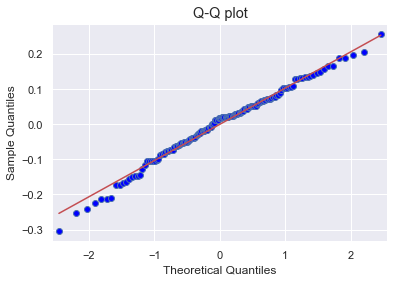

In [466]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');
    

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lm_sm)



The plot shows that the residuals is mostly normal except at the upper tail.
Normality is not a strict assumption and close to normal distribution is fine. Hence, its safe to ignore the upper tail

#https://stats.stackexchange.com/questions/152674/why-is-the-normality-of-residuals-barely-important-at-all-for-the-purpose-of-e


Identifying Outliers/influential Cases

In [467]:
#Function to plot standardized residuals vs Leverage and cook's distance for outlier detection

def influential_outlier_test(model,top_influencing_obs_count):
    
    influence = model.get_influence()

#leverage (hat values)
    leverage = influence.hat_matrix_diag

#When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), 
#the cases are influential to the regression results. The regression results will be altered if we exclude those cases.
    cooks_d = influence.cooks_distance

#standardized residuals= (Residual/STD of Residuals)
    standardized_residuals = influence.resid_studentized_internal

#studentized residuals
    studentized_residuals = influence.resid_studentized_external 
    
    
    plot_lm = plt.figure(figsize=(15,5))
    plt.scatter(leverage, standardized_residuals, alpha=0.5)
    sns.regplot(leverage, standardized_residuals,scatter=False,ci=False,lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm.axes[0].set_xlim(0, max(leverage)+0.01)
    plot_lm.axes[0].set_ylim(-10, 6)
    plot_lm.axes[0].set_title('Standardized Residuals vs Leverage',fontsize=16)
    plot_lm.axes[0].set_xlabel('Leverage',fontsize=13)
    plot_lm.axes[0].set_ylabel('Standardized Residuals',fontsize=13);

    # annotations- #annotating index position of the top n cook's D points 
    
    leverage_top_n_obs = np.flip(np.argsort(cooks_d[0]), 0)[:top_influencing_obs_count]  
    
    for i in leverage_top_n_obs:
        plot_lm.axes[0].annotate(i,xy=(leverage[i],studentized_residuals[i])) 
    
    
# shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(lm_sm.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(leverage), 50),'Cook\'s distance')#cookd= 0.5 line
    plt.legend(loc='upper right');

C:\Users\adeba\AppData\Local\Continuum\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


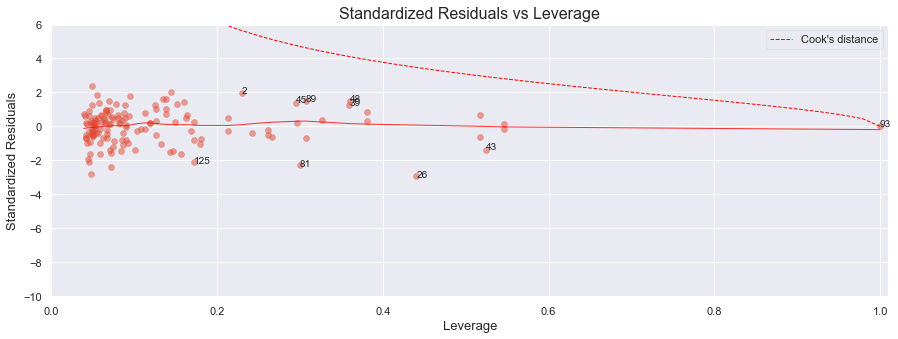

In [468]:
influential_outlier_test(model=lm_sm,top_influencing_obs_count=10)
#I am annotating top 10  

#ignore warning it because you can't calculate the square root of a negative number (stackoveflow)


#looks better. no influential outlier


In [567]:
RMSE_test_dividedby_train = [i / j for i, j in zip(test_RMSE, train_RMSE)]
RMSE_test_dividedby_train

[]